In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn.metrics import accuracy_score
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_digits
digits=load_digits()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,random_state=0)
lr=LogisticRegression().fit(X_train,y_train)
pred=lr.predict(X_test)
print("accuracy:{:.2f}".format(accuracy_score(y_test,pred)))
print("confusion matrix:\n:{}".format(confusion_matrix(y_test,pred)))

accuracy:0.95
confusion matrix:
:[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


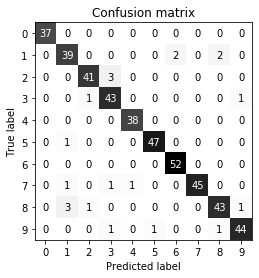

In [4]:
scores_image=mglearn.tools.heatmap(confusion_matrix(y_test,pred),xlabel='Predicted label',ylabel='True label',xticklabels=digits.target_names,
                                  yticklabels=digits.target_names,cmap=plt.cm.gray_r,fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [6]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



In [8]:
from sklearn.metrics import f1_score
#宏macro平均，计算未加权的按类别的f分数，给所有类别相同的权重，无论类别中的样本量大小
#加权weigh
#微micro平均，计算所有类别中假正例，假反例和真正例的总数

print("Micro average f1 score:{:.3f}".format(f1_score(y_test,pred,average="micro")))
print("Macro average f1 score:{:.3f}".format(f1_score(y_test,pred,average="macro")))

Micro average f1 score:0.953
Macro average f1 score:0.954


In [ ]:
#R^2是评估回归问题更直观的指标

In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
#分类问题的默认评分是精度
print("Default scoring:{}".format(cross_val_score(SVC(),digits.data,digits.target==9)))
#指定accuracy为scoring的参数不会改变结果
explicit_accuracy=cross_val_score(SVC(),digits.data,digits.target==9,scoring="accuracy")
print("Explicit accuracy scoring :{}".format(explicit_accuracy))
roc_auc=cross_val_score(SVC(),digits.data,digits.target==9,scoring="roc_auc")
print("AUC scoring:{}".format(roc_auc))

Default scoring:[0.89983306 0.89983306 0.89983306]
Explicit accuracy scoring :[0.89983306 0.89983306 0.89983306]
AUC scoring:[0.99372294 0.98957947 0.99594929]


In [24]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target==9,random_state=0)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

#给出不太好的网格来说明
param_grid={'gamma':[0.0001,0.01,0.1,1,10]}
#使用默认的精度
grid=GridSearchCV(SVC(),param_grid=param_grid)
grid.fit(X_train,y_train)
print("gridsearch with accuracy")
print("Best parameters:",grid.best_params_)
print("Best cross-validation score(accuracy)):{:.3f}".format(grid.best_score_))
print("Test set AUC:{:.3f}".format(roc_auc_score(y_test,grid.decision_function(X_test))))
print("Test set accuracy:{:.3f}".format(grid.score(X_test,y_test)))

gridsearch with accuracy
Best parameters: {'gamma': 0.0001}
Best cross-validation score(accuracy)):0.970
Test set AUC:0.992
Test set accuracy:0.973


In [25]:
grid=GridSearchCV(SVC(),param_grid=param_grid,scoring="roc_auc")
grid.fit(X_train,y_train)
print("\ngridsearch with auc")
print("Best parameters:",grid.best_params_)
print("Best cross-validation score(auc)):{:.3f}".format(grid.best_score_))
print("Test set AUC:{:.3f}".format(roc_auc_score(y_test,grid.decision_function(X_test))))
print("Test set accuracy:{:.3f}".format(grid.score(X_test,y_test)))


gridsearch with auc
Best parameters: {'gamma': 0.01}
Best cross-validation score(auc)):0.997
Test set AUC:1.000
Test set accuracy:1.000


In [26]:
#利用auc找到了精度更高的模型，可能是因为对不平衡数据来说，精度并不是模型性能的良好度量
from sklearn.metrics.scorer import SCORERS
print("Available scorers:\n{}".format(sorted(SCORERS.keys())))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'brier_score_loss', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score']


In [ ]:
#对分类问题，scoring参数最重要的是accuracy，roc_auc，average_precision（两个曲线下方面积），f1，f1_macro,f1_micro,f1_weighed
#对回归问题，最常用包括r2，mean_squared_error（均方误差）mean_absolute_error（平均绝对误差）

In [ ]:
#交叉验证或者使用测试集可以让我们评估未来表现，但是如果使用测试集或交叉验证来选择模型参数，就用完了测试集，发生了泄露得到理想结果
#需要将数据集划分为训练数据，验证数据与测试数据，训练数据构建模型，验证数据选择模型和参数，测试数据用于模型评估，交叉验证代替每次简单划分
#模型选择与模型评估的指标或评分函数相关，最终目标很少是构建一个高精度模型